In [ ]:
#used to stop training a model when it is no longer improving on a given metric
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
filename = r'/content/drive/MyDrive/winequality-white.csv'
import csv
open(filename)

<_io.TextIOWrapper name='/content/drive/MyDrive/winequality-white.csv' mode='r' encoding='UTF-8'>

In [ ]:
import pandas as pd
from IPython.display import display

white_wine = pd.read_csv(filename)

# Create training and validation splits
df_train = white_wine.sample(frac=0.7, random_state=0)
df_valid = white_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
#minmaxscaler
max_ = df_train.max(axis=0) #Calculate the maximum value for each feature in the training set.
min_ = df_train.min(axis=0) #Calculate the minimum value for each feature in the training set
df_train = (df_train - min_) / (max_ - min_) #Scale the training set to the range [0, 1]
df_valid = (df_valid - min_) / (max_ - min_) #Scale the validation set to the range [0, 1].

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2762,7.3,0.32,0.35,1.4,0.050,8.0,163.0,0.99244,3.24,0.42,10.7,5
42,7.0,0.31,0.26,7.4,0.069,28.0,160.0,0.99540,3.13,0.46,9.8,6
1419,7.6,0.14,0.74,1.6,0.040,27.0,103.0,0.99160,3.07,0.40,10.8,7
3664,5.0,0.29,0.54,5.7,0.035,54.0,155.0,0.98976,3.27,0.34,12.9,8


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
#used to compile the model before training.
model.compile(
    optimizer='adam', #Adam optimization algorithm
    loss='mae', #Mean Absolute Error (MAE) loss function to measure prediction accuracy
)

Minimum validation loss: 0.08500111848115921


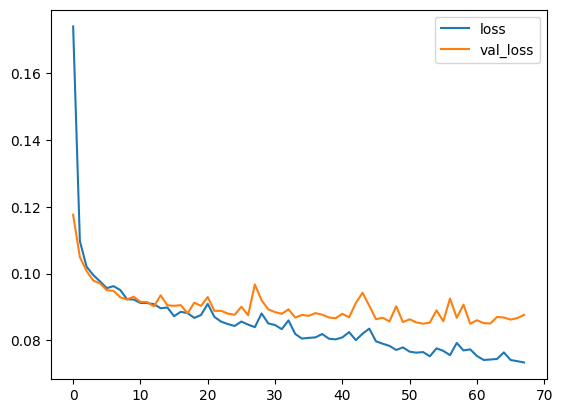

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

# Mục mới